In [ ]:
#
# Modern modeling ~ iris_modeler:  All-in-one iris clasification via nearest neighbors
#

## Here's our _one-cell_ version of the ML workflow <font color="Coral"><b>let's start here. IST341_Participant_8</b></font> &nbsp;&nbsp; <font size="-2">"amoeba version," maybe</font>

This is for iris classification.  You'll run ML on the births and digits!


### <b>Data reminder</b>

In Colab, be sure to upload your <tt>.csv</tt> cleaned data file.

For example, to run the cell below you will need the <tt>iris_cleaned.csv</tt> file -- it's [here](https://drive.google.com/drive/folders/1Qnie8N2VCdumwaFxFldJ_1iQmvtb40pZ?usp=drive_link)

Download it to your machine and then upload it to Colab into the _folder_ &nbsp; icon at left.

### Iris classification via Nearest Neighbors

+ Section 1: Libraries
+ Section 2: Read the already-cleaned data  (+ view, if you wish)
+ Section 3:  Drop any columns we don't want to use
+ Section 4:  create COLUMNS and SPECIES variables to show we're organized + know what's happening...
+ Section 5:  convert from pandas (spreadsheet) to numpy (array)
+ Section 6:  define our features (X_all) and our target-to-predict (y_all)
+ Section 7:  80/20 split into training and testing sets:  X_train and y_train, X_test and y_test
+ Section 8:  Here's where the model-building happens!  First, we guess at the parameters (k=84)
+ Section 9:  Let's see how our model does on the TEST data...
+ Section 10:  Let's cross-validate to find the "best" value of k, best_k
+ Section 11:  Let's build a final model + and see it!

In [ ]:
# Section 1:  Libraries
#
import sklearn          # if not present, use a variant of  !pip3 install -U scikit-learn
import numpy as np      # numpy is Python's "array" library
import pandas as pd     # Pandas is Python's "data" library ("dataframe" == spreadsheet)

# Section 2:  Read the already-cleaned data  (+ view, if you wish)
#
cleaned_filename = "iris_cleaned.csv"     # data should be "tidy" already...
df_tidy = pd.read_csv(cleaned_filename)   # can add encoding="utf-8" if needed
if False:
    print(f"{cleaned_filename} : file read into a pandas dataframe.")
    print("df_tidy is\n", df_tidy)
    print("df_tidy.info() is"); df_tidy.info()

# Section 3:  Drop any columns we don't want to use
ROW = 0
COLUMN = 1
df_model1 = df_tidy.drop('irisname', axis=COLUMN )
if False:  print("df_model1 is\n", df_model1)

# Section 4:  create COLUMNS and SPECIES variables to show we're organized + know what's happening...
COLUMNS = df_model1.columns                     # int to str
SPECIES = ['setosa','versicolor','virginica']   # int to str
SPECIES_INDEX = { s:i for i,s in enumerate(SPECIES) }  # str to int   {'setosa':0,'versicolor':1,'virginica':2}
COLUMNS_INDEX = { c:i for i,c in enumerate(COLUMNS) }  # str to int   {'sepallen':0,'sepalwid':1,'petallen':2, <more> }
if False:  print(f"{COLUMNS = } \n {COLUMNS_INDEX = } \n {SPECIES = } \n {SPECIES_INDEX = }")

# Section 5:  convert from pandas (spreadsheet) to numpy (array)
A = df_model1.to_numpy()    # yields the underlying numpy array
A = A.astype('float64')     # make sure everything is floating-point
NUM_ROWS, NUM_COLS = A.shape   # let's have NUM_ROWS and NUM_COLS around
if False:  print(f"\nThe dataset has {NUM_ROWS} rows and {NUM_COLS} cols")

# Section 6:  define our features (X_all) and our target-to-predict (y_all)
X_all = A[:,0:4]  # X (features) WATCH OUT! This is likely to change from model to model...
y_all = A[:,4]    # y (labels) WATCH OUT! This is likely to change from model to model...
if False:
    print(f"The labels/species are \n {y_all} \n ");
    print(f"The first few data rows are \n {X_all[0:5,:]}")

# Section 7:  80/20 split into training and testing sets:  X_train and y_train, X_test and y_test
from sklearn.model_selection import train_test_split      # this function splits into training + testing sets
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.20)  # random_state=42 # 20% testing
if False:
    print(f"training with {len(y_train)} rows;  testing with {len(y_test)} rows\n" )
    print(f"Held-out testing data... (testing data: {len(y_test)} rows)")
    print(f"y_test: {y_test}")
    print(f"X_test (first few rows): {X_test[0:5,:]}\n")
    print(f"Training Data used for modeling... (training data: {len(y_train)} rows)")
    print(f"y_train: {y_train}")
    print(f"X_train (first few rows): {X_train[0:5,:]}")  # 5 rows

# Section 8:  Here's where the model-building happens!  First, we guess at the parameters (k=84)
from sklearn.neighbors import KNeighborsClassifier
k = 84   # we don't know what k to use, so we guess!  (this will _not_ be a good value)
knn_model = KNeighborsClassifier(n_neighbors=k)       # here, k is the "k" in kNN
knn_model.fit(X_train, y_train)      # we train the model ... it's one line!
if False:  print("Created and trained a knn classifier with k =", k)

# Section 9:  Let's see how our naive model does on the TEST data!
predicted_labels = knn_model.predict(X_test)      # THIS IS THE KEY LINE:  predict
actual_labels = y_test
if True:
    print("Predicted labels:", predicted_labels)
    print("Actual  labels  :", actual_labels)
    num_correct = sum(predicted_labels == actual_labels)
    total = len(actual_labels)
    print(f"\nResults on test set:  {num_correct} correct out of {total} total, for {num_correct*100/total:5.2f}%\n")

# Section 10:  Let's cross-validate to find the "best" value of k, best_k:
import time
from sklearn.model_selection import cross_val_score
all_accuracies = []
best_k = 84  # Not correct!
best_accuracy = 0.0  # also not correct...
for k in range(1,85):    # Note that we are cross-validating using only our TRAINING data!
    knn_cv_model = KNeighborsClassifier(n_neighbors=k)   # build a knn_model for every k
    cv_scores = cross_val_score( knn_cv_model, X_train, y_train, cv=5 )  # cv=5 means 80/20
    this_cv_accuracy = cv_scores.mean()               # mean() is numpy's built-in average function
    if False: print(f"k: {k:2d}  cv accuracy: {this_cv_accuracy:7.4f}")
    if this_cv_accuracy > best_accuracy:  # is this one better?
        best_accuracy = this_cv_accuracy  # track the best accuracy
        best_k = k                        # with the best k
    all_accuracies.append(this_cv_accuracy)
    time.sleep(0.002)   # dramatic pauses!
if True: print(f"best_k = {best_k}  \n    yields the highest cv accuracy: {100*best_accuracy:5.2f}%")  # print the best one

# Section 11:  Here's where the model-building happens with the best-found parameters:
knn_model_final = KNeighborsClassifier(n_neighbors=best_k)
knn_model_final.fit(X_all, y_all)      # we train the model ... on _all_ the data!
if True:  print("\nCreated and trained a classifier named knn_model_final with best_k =", best_k)


Predicted labels: [1. 2. 1. 1. 1. 2. 1. 1. 1. 2. 1. 2. 1. 2. 1. 1. 2. 1. 2. 2. 1. 1. 2. 2.
 1. 1. 2. 2. 2.]
Actual  labels  : [0. 2. 0. 1. 1. 1. 0. 0. 0. 2. 0. 2. 0. 2. 0. 0. 2. 0. 1. 1. 1. 0. 1. 1.
 0. 0. 2. 2. 2.]

Results on test set:  11 correct out of 29 total, for 37.93%

best_k = 3  
    yields the highest cv accuracy: 94.70%

Created and trained a classifier named knn_model_final with best_k = 3


### Optional:  Let's format things more carefully...

In [ ]:
#
# Let's print things in a vertical table
#

def compare_labels(predicted_labels, actual_labels):
    """ a more neatly formatted comparison """
    NUM_LABELS = len(predicted_labels)
    num_correct = 0

    print()
    print(f'row {"#":>3s} : {"predicted":>12s} {"actual":<12s}   {"result"}')

    for i in range(NUM_LABELS):
        p = int(round(predicted_labels[i]))         # round protects from fp error
        a = int(round(actual_labels[i]))
        result = "incorrect"
        if p == a:  # if they match,
            result = ""       # no longer incorrect
            num_correct += 1  # and we count a match!

        print(f"row {i:>3d} : {SPECIES[p]:>12s} {SPECIES[a]:<12s}   {result}")

    print()
    print("Correct:", num_correct, "out of", NUM_LABELS)
    return num_correct

# let's try it out!
print("The UNTUNED model results (not the final model):")
compare_labels(predicted_labels,actual_labels)

The UNTUNED model results (not the final model):

row   # :    predicted actual         result
row   0 :       setosa setosa         
row   1 :       setosa setosa         
row   2 :       setosa setosa         
row   3 :   versicolor versicolor     
row   4 :       setosa setosa         
row   5 :   versicolor setosa         incorrect
row   6 :       setosa setosa         
row   7 :       setosa setosa         
row   8 :       setosa setosa         
row   9 :       setosa setosa         
row  10 :       setosa setosa         
row  11 :       setosa setosa         
row  12 :       setosa setosa         
row  13 :   versicolor versicolor     
row  14 :   versicolor versicolor     
row  15 :   versicolor versicolor     
row  16 :       setosa setosa         
row  17 :       setosa setosa         
row  18 :   versicolor versicolor     
row  19 :   versicolor setosa         incorrect
row  20 :       setosa setosa         
row  21 :       setosa versicolor     incorrect
row  22 :   versicol

56

### <b><font color="DodgerBlue">We did it!</font></b>: &nbsp; Now, let's use the predictive model!

We can use the predictive model to make predictions and try it out!

In [ ]:
#
# Ok!  We have our knn model, let's use it...
#
# ... in a data-trained predictive model (k-nearest-neighbors), using scikit-learn
#
# warning: this model has NOT yet been tuned to its "best k"
#
def predictive_model( Features ):
    """ input: a list of four features
                [ sepallen, sepalwid, petallen, petalwid ]
        output: the predicted species of iris, from
                  setosa (0), versicolor (1), virginica (2)
    """
    our_features = np.asarray([Features])                      # extra brackets needed so it's 2d
    predicted_species_list = knn_model_final.predict(our_features)   # PREDICT!

    predicted_species = int(round(predicted_species_list[0]))  # unpack the one element it contains
    name = SPECIES[predicted_species]                          # look up the species
    return name

#
# Try it!
#
# Features = eval(input("Enter new Features: "))
#
ListofFeatures = [ [6.7,3.3,5.7,2.1],
                   [5.8,2.7,4.1,1.0],
                   [4.6,3.6,3.0,2.2],
                   [6.7,3.3,5.7,2.1],
                   [4.2,4.2,4.2,4.2],
                   [1,42,4.7,3.01],        # -4.7? .01?  0?
                   ]

for Features in ListofFeatures:
    result = predictive_model( Features )
    print(f"From the Features {Features}, I predict {result}")

From the Features [6.7, 3.3, 5.7, 2.1], I predict virginica
From the Features [5.8, 2.7, 4.1, 1.0], I predict versicolor
From the Features [4.6, 3.6, 3.0, 2.2], I predict versicolor
From the Features [6.7, 3.3, 5.7, 2.1], I predict virginica
From the Features [4.2, 4.2, 4.2, 4.2], I predict virginica
From the Features [1, 42, 4.7, 3.01], I predict setosa


### This feels like an excuse to plot with seaborn...

<Axes: xlabel='k_value', ylabel='accuracy'>

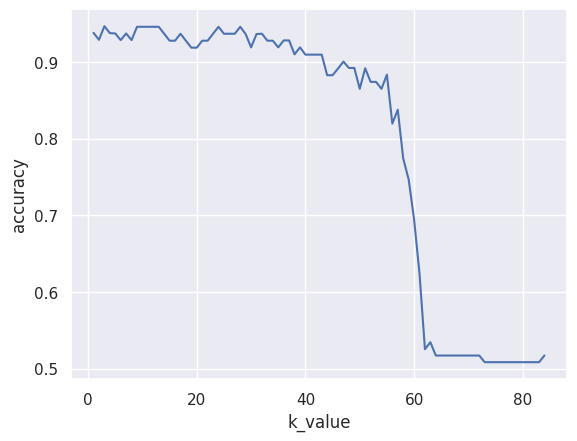

In [ ]:
### Let's see all the accuracies!

import pandas as pd
# Let's create a pandas dataframe out of the above cell's data
crossvalidation_df = pd.DataFrame( {"k_value":np.asarray(range(1,84+1)),
                                    "accuracy":np.asarray(all_accuracies)}
                                    )

import seaborn as sns
sns.set_theme(style="darkgrid")
# Plot the responses for different events and regions
sns.lineplot(x="k_value", y="accuracy",  #  hue="region", style="event",
             data=crossvalidation_df)

### Let's use the "correct value" of k

It will not always be the same, because cross-validation is randomized...

### We're ready to deploy our "final + best" predictive model!

In [ ]:
#
# final predictive model (k-nearest-neighbor), with tuned k + ALL data incorporated
#

def predictive_model( Features, Model ):                 # to allow the input of any Model
    """ input: a list of four features
                [ sepallen, sepalwid, petallen, petalwid ]
        output: the predicted species of iris, from
                  setosa (0), versicolor (1), virginica (2)
    """
    our_features = np.asarray([Features])                 # extra brackets needed for 2d
    predicted_species = Model.predict(our_features)       # The model's prediction!
    predicted_species = int(round(predicted_species[0]))  # unpack the extra brackets
    return predicted_species

#
# Try it!
#

LoF = [
[4.8, 3.1, 1.6, 0.2 ],   # actually setosa
[5.7, 2.9, 4.2, 1.3 ],   # actually versicolor
[5.8, 2.7, 5.1, 1.9 ],   # actually virginica
[5.2, 4.1, 1.5, 0.1 ],   # actually setosa
[5.4, 3.4, 1.5, 0.4 ],   # actually setosa
[5.1, 2.5, 3.0, 1.1 ],   # actually versicolor
[6.2, 2.9, 4.3, 1.3 ],   # actually versicolor
[6.3, 3.3, 6.0, 2.5 ],   # actually virginica
[5.7, 2.8, 4.1, 1.3 ],   # actually virginica  <-- almost always wrong!

[0.0,0.0,0.0,0.0],               # used as a separator here

[3.7, 2.8, 2.1, 0.3 ],   # let's use this for our own "new" iris ...
]

# run on each one:
for Features in LoF:
    predicted_species = predictive_model( Features, knn_model_final )  # pass in the model, too!
    name = SPECIES[predicted_species]
    print(f"from the features {Features} I predict {name} ")    # Answers in the assignment...

from the features [4.8, 3.1, 1.6, 0.2] I predict setosa 
from the features [5.7, 2.9, 4.2, 1.3] I predict versicolor 
from the features [5.8, 2.7, 5.1, 1.9] I predict virginica 
from the features [5.2, 4.1, 1.5, 0.1] I predict setosa 
from the features [5.4, 3.4, 1.5, 0.4] I predict setosa 
from the features [5.1, 2.5, 3.0, 1.1] I predict versicolor 
from the features [6.2, 2.9, 4.3, 1.3] I predict versicolor 
from the features [6.3, 3.3, 6.0, 2.5] I predict virginica 
from the features [5.7, 2.8, 4.1, 1.3] I predict versicolor 
from the features [0.0, 0.0, 0.0, 0.0] I predict setosa 
from the features [3.7, 2.8, 2.1, 0.3] I predict setosa 


### Predictive models aren't perfect!
+ Notice that the last prediction above the [0,0,0,0] is (probably) wrong
  + It probably predicted _versicolor_, but it was actually a _virginica_
  + In essence, it was a _virginica_ iris that "looked more like" a _versicolor_ ... ***from these four features!***
  + A botanist would use more than these four features to classify difference species...

+ **Key**: Even when the modeling process runs "perfectly," the models are likely to be imperfect...
+ ... it's just that we won't know where the imperfections are -- until future observations arrive!

In [ ]:
#
# That's it!  Welcome to the world of model-building workflows!!
#
#             Our prediction?  We'll be back for more ML!
#
# In fact, the rest of the hw is to run more ML workflows:
# Births, Digits, another dataset, which could be Titanic, Housing, ...
#
# and more ML algorithms:
# Decision Trees, Random Forests, Neural Nets
# and, optionally, time series, recommendation systems, ...

### That's it! Our model is complete...

... not perfect, but **complete**

What does this mean?

It means that the model -- the function (above) -- is ***already*** prepared to provide an output for every possible input!

We can see this in a plot of the outputs for every input in the "sepal" plane (length vs. width) as well as the "petal" plane:

In [ ]:
# we can only plot 2 dimensions at a time!
# These two will be our constants:
sepallen = 5.0
sepalwid = 3.0
# petallen =
# petalwid =

VERTICAL = np.arange(0,8,.1) # array of vertical input values
HORIZONT = np.arange(0,8,.1) # array of horizontal input values
PLANE = np.zeros( (len(HORIZONT),len(VERTICAL)) ) # the output array
MODEL = knn_model_final


col = 0
row = 0
for petallen in VERTICAL: # for every sepal length
  for petalwid in HORIZONT: # for every sepal width
    Features = [ sepallen, sepalwid, petallen, petalwid ]
    output = predictive_model(Features,MODEL)
    #print(f"Input {Features} Output: {output}")
    PLANE[row,col] = output
    row += 1
  row = 0
  col += 1
  print(".", end="")  # so we know it's running
  if col % 42 == 0: print() # same...

print("\n", PLANE[0:3,0:3]) # small bit of the lower-left corner

..........................................
......................................
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


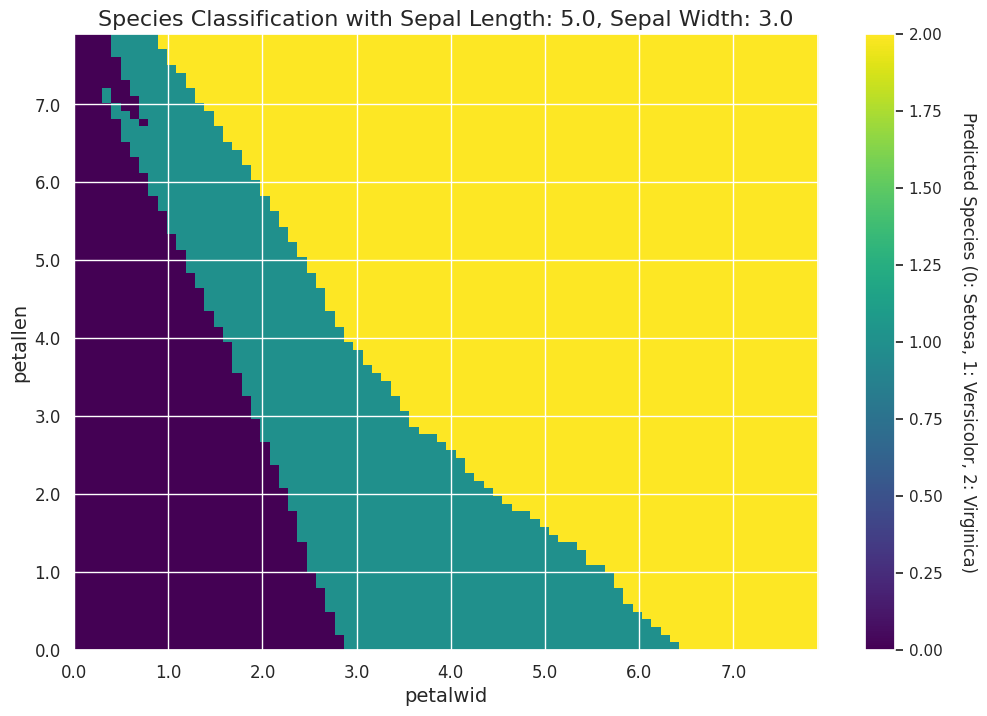

Remember our species-to-number mapping:
0 - setosa
1 - versicolor
2 - virginica


In [ ]:
# Assuming 'PLANE', 'VERTICAL', and 'HORIZONT' are defined as in the original code

# Create a new figure and axes
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 8))

# Create the heatmap
im = ax.imshow(PLANE, cmap="viridis", extent=[HORIZONT.min(), HORIZONT.max(), VERTICAL.min(), VERTICAL.max()], origin="lower", aspect="auto")

# Set axis labels and ticks
ax.set_xlabel("petalwid", fontsize=14)
ax.set_ylabel("petallen", fontsize=14)

# Calculate the indices for reduced ticks and labels
reduced_tick_indices = np.arange(0, len(HORIZONT), len(HORIZONT)//8)
# Ensure that the last index is included
# if reduced_tick_indices[-1] != len(HORIZONT)-1:
#   reduced_tick_indices = np.append(reduced_tick_indices, len(HORIZONT)-1)


# Set ticks and tick labels with correct values
ax.set_xticks(HORIZONT[reduced_tick_indices]) # Display ticks every 0.4 unit
ax.set_yticks(VERTICAL[reduced_tick_indices])
ax.set_xticklabels([f"{x:.1f}" for x in HORIZONT[reduced_tick_indices]], fontsize=12)  # Format x-axis labels
ax.set_yticklabels([f"{y:.1f}" for y in VERTICAL[reduced_tick_indices]], fontsize=12)  # Format y-axis labels


# Add a colorbar
cbar = plt.colorbar(im)
cbar.set_label('Predicted Species (0: Setosa, 1: Versicolor, 2: Virginica)', rotation=270, labelpad=25)

# Set the title
ax.set_title(f"Species Classification with Sepal Length: {sepallen}, Sepal Width: {sepalwid}", fontsize=16)

plt.show()

print("Remember our species-to-number mapping:")
print("0 - setosa")
print("1 - versicolor")
print("2 - virginica")

We've done it!

Remember that the model _thinks_ it knows everything...

But it's way too confident! &nbsp;&nbsp; (This seems like an AI theme...)

<br>
<hr>
<br>

In [ ]:
# Section 1:  Libraries
#
import sklearn          # if not present, use a variant of  !pip3 install -U scikit-learn
import numpy as np      # numpy is Python's "array" library
import pandas as pd     # Pandas is Python's "data" library ("dataframe" == spreadsheet)

# Section 2:  Read the already-cleaned data  (+ view, if you wish)
#
cleaned_filename = "births.csv"     # data should be "tidy" already...
df_tidy = pd.read_csv(cleaned_filename)   # can add encoding="utf-8" if needed
if False:
    print(f"{cleaned_filename} : file read into a pandas dataframe.")
    print("df_tidy is\n", df_tidy)
    print("df_tidy.info() is"); df_tidy.info()
df_tidy['above/below median'] = df_tidy['above/below median'].map({'below': 0, 'above': 1})

# Section 3:  Drop any columns we don't want to use
ROW = 0
COLUMN = 0
df_model1 = df_tidy[['month', 'day']]  # keep only these two
if False:  print("df_model1 is\n", df_model1)

# Section 4:  create COLUMNS and SPECIES variables to show we're organized + know what's happening...
COLUMNS = df_model1.columns                     # int to str
BIRTHS = ['below','above']   # int to str
BIRTHS_INDEX = { s:i for i,s in enumerate(BIRTHS) }  # str to int   {'setosa':0,'versicolor':1,'virginica':2}
COLUMNS_INDEX = { c:i for i,c in enumerate(COLUMNS) }  # str to int   {'sepallen':0,'sepalwid':1,'petallen':2, <more> }
if False:  print(f"{COLUMNS = } \n {COLUMNS_INDEX = } \n {BIRTHS = } \n {BIRTHS_INDEX = }")

# Section 5:  convert from pandas (spreadsheet) to numpy (array)
A = df_model1.to_numpy()    # yields the underlying numpy array
A = A.astype('float64')     # make sure everything is floating-point
NUM_ROWS, NUM_COLS = A.shape   # let's have NUM_ROWS and NUM_COLS around
if False:  print(f"\nThe dataset has {NUM_ROWS} rows and {NUM_COLS} cols")

# Section 6:  define our features (X_all) and our target-to-predict (y_all)
X_all = df_model1.to_numpy()
y_all = df_tidy['above/below median'].to_numpy()
#X_all = A[:,0:2]  # X (features) WATCH OUT! This is likely to change from model to model...
#y_all = A[:,2]    # y (labels) WATCH OUT! This is likely to change from model to model...
if False:
    print(f"The labels/species are \n {y_all} \n ");
    print(f"The first few data rows are \n {X_all[0:5,:]}")

# Section 7:  80/20 split into training and testing sets:  X_train and y_train, X_test and y_test
from sklearn.model_selection import train_test_split      # this function splits into training + testing sets
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.20)  # random_state=42 # 20% testing
if False:
    print(f"training with {len(y_train)} rows;  testing with {len(y_test)} rows\n" )
    print(f"Held-out testing data... (testing data: {len(y_test)} rows)")
    print(f"y_test: {y_test}")
    print(f"X_test (first few rows): {X_test[0:5,:]}\n")
    print(f"Training Data used for modeling... (training data: {len(y_train)} rows)")
    print(f"y_train: {y_train}")
    print(f"X_train (first few rows): {X_train[0:5,:]}")  # 5 rows

# Section 8:  Here's where the model-building happens!  First, we guess at the parameters (k=84)
from sklearn.neighbors import KNeighborsClassifier
k = 84   # we don't know what k to use, so we guess!  (this will _not_ be a good value)
knn_model = KNeighborsClassifier(n_neighbors=k)       # here, k is the "k" in kNN
knn_model.fit(X_train, y_train)      # we train the model ... it's one line!
if False:  print("Created and trained a knn classifier with k =", k)

# Section 9:  Let's see how our naive model does on the TEST data!
predicted_labels = knn_model.predict(X_test)      # THIS IS THE KEY LINE:  predict
actual_labels = y_test
if True:
    print("Predicted labels:", predicted_labels)
    print("Actual  labels  :", actual_labels)
    num_correct = sum(predicted_labels == actual_labels)
    total = len(actual_labels)
    print(f"\nResults on test set:  {num_correct} correct out of {total} total, for {num_correct*100/total:5.2f}%\n")

# Section 10:  Let's cross-validate to find the "best" value of k, best_k:
import time
from sklearn.model_selection import cross_val_score
all_accuracies = []
best_k = 84  # Not correct!
best_accuracy = 0.0  # also not correct...
for k in range(1,85):    # Note that we are cross-validating using only our TRAINING data!
    knn_cv_model = KNeighborsClassifier(n_neighbors=k)   # build a knn_model for every k
    cv_scores = cross_val_score( knn_cv_model, X_train, y_train, cv=5 )  # cv=5 means 80/20
    this_cv_accuracy = cv_scores.mean()               # mean() is numpy's built-in average function
    if False: print(f"k: {k:2d}  cv accuracy: {this_cv_accuracy:7.4f}")
    if this_cv_accuracy > best_accuracy:  # is this one better?
        best_accuracy = this_cv_accuracy  # track the best accuracy
        best_k = k                        # with the best k
    all_accuracies.append(this_cv_accuracy)
    time.sleep(0.002)   # dramatic pauses!
if True: print(f"best_k = {best_k}  \n    yields the highest cv accuracy: {100*best_accuracy:5.2f}%")  # print the best one

# Section 11:  Here's where the model-building happens with the best-found parameters:
knn_model_final = KNeighborsClassifier(n_neighbors=best_k)
knn_model_final.fit(X_all, y_all)      # we train the model ... on _all_ the data!
if True:  print("\nCreated and trained a classifier named knn_model_final with best_k =", best_k)


Predicted labels: [0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0 1 0
 1 1 0 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 1]
Actual  labels  : [0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0 0 1 1 0
 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1 0 0
 1]

Results on test set:  56 correct out of 75 total, for 74.67%

best_k = 5  
    yields the highest cv accuracy: 84.82%

Created and trained a classifier named knn_model_final with best_k = 5


In [ ]:
#
# Ok!  We have our knn model, let's use it...
#
# ... in a data-trained predictive model (k-nearest-neighbors), using scikit-learn
#
# warning: this model has NOT yet been tuned to its "best k"
#
def predictive_model( Features ):
    """ input: a list of two features
                [ month, day]
        output: the predicted birth, from
                  below (0), above (1)
    """
    our_features = np.asarray([Features])                      # extra brackets needed so it's 2d
    predicted_births_list = knn_model_final.predict(our_features)   # PREDICT!

    predicted_births = int(round(predicted_births_list[0]))  # unpack the one element it contains
    name = BIRTHS[predicted_births]                          # look up the species
    return name

#
# Try it!
#
# Features = eval(input("Enter new Features: "))
#
ListofFeatures = [ [11,11],
                   [11,10],
                   [2,29],
                   [1,30],
                   [7,14],
                   [4,30],        # -4.7? .01?  0?
                   ]

for Features in ListofFeatures:
    result = predictive_model( Features )
    print(f"From the Features {Features}, I predict {result}")

From the Features [11, 11], I predict above
From the Features [11, 10], I predict above
From the Features [2, 29], I predict below
From the Features [1, 30], I predict below
From the Features [7, 14], I predict above
From the Features [4, 30], I predict below


<Axes: xlabel='k_value', ylabel='accuracy'>

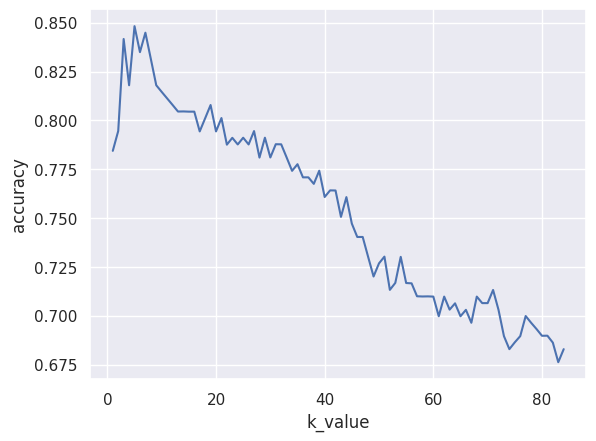

In [ ]:
### Let's see all the accuracies!

import pandas as pd
# Let's create a pandas dataframe out of the above cell's data
crossvalidation_df = pd.DataFrame( {"k_value":np.asarray(range(1,84+1)),
                                    "accuracy":np.asarray(all_accuracies)}
                                    )

import seaborn as sns
sns.set_theme(style="darkgrid")
# Plot the responses for different events and regions
sns.lineplot(x="k_value", y="accuracy",  #  hue="region", style="event",
             data=crossvalidation_df)

# Your tasks!

Based on the examples above, your task is to build a kNN model (along with the tests and visualizations) for two datasets:

*   the births dataset and
*   the digits dataset

<br>
<hr>
<br>

Suggestion:  Perhaps open this notebook twice...

_Then you can copy-paste-adapt the iris workflow to each new dataset!_

<br>
<hr>
<br>

As optional EC, track down another dataset of your own choosing and build a DT+RF model  

Notice that this can be an excellent final project, too! 😃

In [ ]:
# Section 1:  Libraries
#
import sklearn          # if not present, use a variant of  !pip3 install -U scikit-learn
import numpy as np      # numpy is Python's "array" library
import pandas as pd     # Pandas is Python's "data" library ("dataframe" == spreadsheet)

# Section 2:  Read the already-cleaned data  (+ view, if you wish)
#
cleaned_filename = "digits.csv"     # data should be "tidy" already...
df_tidy = pd.read_csv(cleaned_filename)   # can add encoding="utf-8" if needed
if False:
    print(f"{cleaned_filename} : file read into a pandas dataframe.")
    print("df_tidy is\n", df_tidy)
    print("df_tidy.info() is"); df_tidy.info()

# Section 3:  Drop any columns we don't want to use
columns_to_keep = [f'pix{i}' for i in range(15)] + ['actual_digit']
df_model1 = df_tidy[columns_to_keep].copy()

#ROW = 0
#COLUMN = 0
#df_model1 = df_tidy.drop(columns=['excerpted from http://yann.lecun.com/exdb/mnist/'])
#df_model1 = df_tidy.drop('pix0', axis=1 )
#if False:  print("df_model1 is\n", df_model1)
#df_model1 = df_tidy.copy()

# Section 4:  create COLUMNS and SPECIES variables to show we're organized + know what's happening...
COLUMNS = df_model1.columns                     # int to str
DIGITS = ['0','1', '2', '3', '4', '5', '6', '7', '8', '9']   # int to str
DIGITS_INDEX = { s:i for i,s in enumerate(DIGITS) }  # str to int   {'setosa':0,'versicolor':1,'virginica':2}
COLUMNS_INDEX = { c:i for i,c in enumerate(COLUMNS) }  # str to int   {'sepallen':0,'sepalwid':1,'petallen':2, <more> }
if False:  print(f"{COLUMNS = } \n {COLUMNS_INDEX = } \n {DIGITS = } \n {DIGITS_INDEX = }")

# Section 5:  convert from pandas (spreadsheet) to numpy (array)
A = df_model1.to_numpy()    # yields the underlying numpy array
A = A.astype('float64')     # make sure everything is floating-point
NUM_ROWS, NUM_COLS = A.shape   # let's have NUM_ROWS and NUM_COLS around
if False:  print(f"\nThe dataset has {NUM_ROWS} rows and {NUM_COLS} cols")

# Section 6:  define our features (X_all) and our target-to-predict (y_all)
X_all = df_model1.drop(columns=['actual_digit']).to_numpy().astype('float64')  # 64 pixel features
y_all = df_model1['actual_digit'].to_numpy()
#X_all = A[:,0:63]  # X (features) WATCH OUT! This is likely to change from model to model...
#y_all = A[:,0]    # y (labels) WATCH OUT! This is likely to change from model to model...
if False:
    print(f"The labels/species are \n {y_all} \n ");
    print(f"The first few data rows are \n {X_all[0:5,:]}")

# Section 7:  80/20 split into training and testing sets:  X_train and y_train, X_test and y_test
from sklearn.model_selection import train_test_split      # this function splits into training + testing sets
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.20)  # random_state=42 # 20% testing
if False:
    print(f"training with {len(y_train)} rows;  testing with {len(y_test)} rows\n" )
    print(f"Held-out testing data... (testing data: {len(y_test)} rows)")
    print(f"y_test: {y_test}")
    print(f"X_test (first few rows): {X_test[0:5,:]}\n")
    print(f"Training Data used for modeling... (training data: {len(y_train)} rows)")
    print(f"y_train: {y_train}")
    print(f"X_train (first few rows): {X_train[0:5,:]}")  # 5 rows

# Section 8:  Here's where the model-building happens!  First, we guess at the parameters (k=84)
from sklearn.neighbors import KNeighborsClassifier
k = 84   # we don't know what k to use, so we guess!  (this will _not_ be a good value)
knn_model = KNeighborsClassifier(n_neighbors=k)       # here, k is the "k" in kNN
knn_model.fit(X_train, y_train)      # we train the model ... it's one line!
if False:  print("Created and trained a knn classifier with k =", k)

# Section 9:  Let's see how our naive model does on the TEST data!
predicted_labels = knn_model.predict(X_test)      # THIS IS THE KEY LINE:  predict
actual_labels = y_test
if True:
    print("Predicted labels:", predicted_labels)
    print("Actual  labels  :", actual_labels)
    num_correct = sum(predicted_labels == actual_labels)
    total = len(actual_labels)
    print(f"\nResults on test set:  {num_correct} correct out of {total} total, for {num_correct*100/total:5.2f}%\n")

# Section 10:  Let's cross-validate to find the "best" value of k, best_k:
import time
from sklearn.model_selection import cross_val_score
all_accuracies = []
best_k = 84  # Not correct!
best_accuracy = 0.0  # also not correct...
for k in range(1,85):    # Note that we are cross-validating using only our TRAINING data!
    knn_cv_model = KNeighborsClassifier(n_neighbors=k)   # build a knn_model for every k
    cv_scores = cross_val_score( knn_cv_model, X_train, y_train, cv=5 )  # cv=5 means 80/20
    this_cv_accuracy = cv_scores.mean()               # mean() is numpy's built-in average function
    if False: print(f"k: {k:2d}  cv accuracy: {this_cv_accuracy:7.4f}")
    if this_cv_accuracy > best_accuracy:  # is this one better?
        best_accuracy = this_cv_accuracy  # track the best accuracy
        best_k = k                        # with the best k
    all_accuracies.append(this_cv_accuracy)
    time.sleep(0.002)   # dramatic pauses!
if True: print(f"best_k = {best_k}  \n    yields the highest cv accuracy: {100*best_accuracy:5.2f}%")  # print the best one

# Section 11:  Here's where the model-building happens with the best-found parameters:
knn_model_final = KNeighborsClassifier(n_neighbors=best_k)
knn_model_final.fit(X_all, y_all)      # we train the model ... on _all_ the data!
if True:  print("\nCreated and trained a classifier named knn_model_final with best_k =", best_k)


Predicted labels: [9 7 7 3 6 1 0 5 0 4 7 2 3 9 4 1 7 5 7 6 9 6 5 4 8 1 6 0 6 9 0 7 7 5 7 5 9
 3 6 3 6 6 8 2 6 7 1 3 6 7 0 7 4 1 1 7 3 0 7 4 2 4 0 6 4 4 5 1 3 8 7 8 1 5
 5 7 0 6 1 0 5 3 0 7 2 8 4 6 9 0 4 5 6 3 5 0 0 2 4 7 0 7 8 1 5 1 1 3 3 3 6
 6 9 4 6 0 3 0 6 8 1 4 6 1 9 6 6 7 1 4 0 0 3 5 6 8 3 0 7 0 4 2 2 7 2 2 5 4
 3 3 1 9 7 0 3 2 7 2 7 8 5 7 0 1 1 2 3 0 2 0 5 6 3 6 8 0 2 1 1 3 8 3 0 6 1
 7 6 2 6 6 5 2 6 5 1 7 2 9 7 7 0 3 1 5 4 3 9 6 2 3 1 4 7 0 7 8 6 6 0 9 1 0
 6 0 1 2 4 5 8 6 6 9 1 6 0 3 0 0 2 0 4 0 9 8 9 2 0 3 6 0 7 0 2 4 7 3 3 8 5
 0 2 5 0 0 0 1 7 7 0 4 3 5 6 1 0 1 1 1 0 6 9 5 2 4 6 2 0 9 0 4 8 2 6 8 1 1
 2 1 8 3 7 0 6 0 0 0 1 6 0 5 0 0 2 7 2 0 7 0 7 1 5 6 5 6 5 2 2 2 7 3 5 3 9
 0 6 4 8 4 3 2 3 7 2 3 5 4 3 6 7 9 5 1 6 6]
Actual  labels  : [9 7 3 3 1 9 0 5 0 6 7 3 3 8 4 1 3 5 9 6 0 4 5 4 0 2 4 0 6 9 9 9 5 5 7 5 9
 3 0 8 6 6 8 7 6 7 1 3 6 8 0 7 4 1 1 3 9 0 7 4 3 4 2 1 4 4 5 1 3 0 1 7 1 5
 5 7 0 6 0 1 5 3 0 7 2 3 6 6 3 0 4 5 1 3 5 0 0 2 6 8 3 9 3 1 5 1 1 3 8 2 6
 1 9 4 6 0 3 0 4 8 1

In [ ]:
#
# Ok!  We have our knn model, let's use it...
#
# ... in a data-trained predictive model (k-nearest-neighbors), using scikit-learn
#
# warning: this model has NOT yet been tuned to its "best k"
#
def predictive_model( Features ):
    """ input: a list of two features
                [ month, day]
        output: the predicted birth, from
                  below (0), above (1)
    """
    our_features = np.asarray([Features])                      # extra brackets needed so it's 2d
    predicted_digits_list = knn_model_final.predict(our_features)   # PREDICT!

    predicted_digits = int(round(predicted_digits_list[0]))  # unpack the one element it contains
    name = DIGITS[predicted_digits]                          # look up the species
    return name

#
# Try it!
#
# Features = eval(input("Enter new Features: "))
#
ListofFeatures = [ [11,11,9,1,3,4,5,6,7,8,10,0,1,4,5],
                   [11,10,9,1,3,4,5,6,7,8,10,0,1,4,5],
                   [2,29,9,1,3,4,5,6,7,8,10,0,1,4,5],
                   [2,29,0,0,1,0,5,5,7,8,10,0,1,4,5],
                   [7,14,9,1,3,4,5,6,7,8,10,0,1,4,5],
                   [1,30,0,0,1,0,5,5,7,8,10,0,1,4,5],        # -4.7? .01?  0?
                   [7,14,16,0,1,0,5,5,7,8,10,0,1,4,5],
                   [1,30,16,0,1,0,5,5,7,8,10,0,1,4,5],
                   [4,30,0,0,0,0,16,9,8,10,0,6,6,16,1],        # -4.7? .01?  0?
                   ]

for Features in ListofFeatures:
    result = predictive_model( Features )
    print(f"From the Features {Features}, I predict {result}")

From the Features [11, 11, 9, 1, 3, 4, 5, 6, 7, 8, 10, 0, 1, 4, 5], I predict 8
From the Features [11, 10, 9, 1, 3, 4, 5, 6, 7, 8, 10, 0, 1, 4, 5], I predict 8
From the Features [2, 29, 9, 1, 3, 4, 5, 6, 7, 8, 10, 0, 1, 4, 5], I predict 8
From the Features [2, 29, 0, 0, 1, 0, 5, 5, 7, 8, 10, 0, 1, 4, 5], I predict 6
From the Features [7, 14, 9, 1, 3, 4, 5, 6, 7, 8, 10, 0, 1, 4, 5], I predict 8
From the Features [1, 30, 0, 0, 1, 0, 5, 5, 7, 8, 10, 0, 1, 4, 5], I predict 6
From the Features [7, 14, 16, 0, 1, 0, 5, 5, 7, 8, 10, 0, 1, 4, 5], I predict 8
From the Features [1, 30, 16, 0, 1, 0, 5, 5, 7, 8, 10, 0, 1, 4, 5], I predict 2
From the Features [4, 30, 0, 0, 0, 0, 16, 9, 8, 10, 0, 6, 6, 16, 1], I predict 1


<Axes: xlabel='k_value', ylabel='accuracy'>

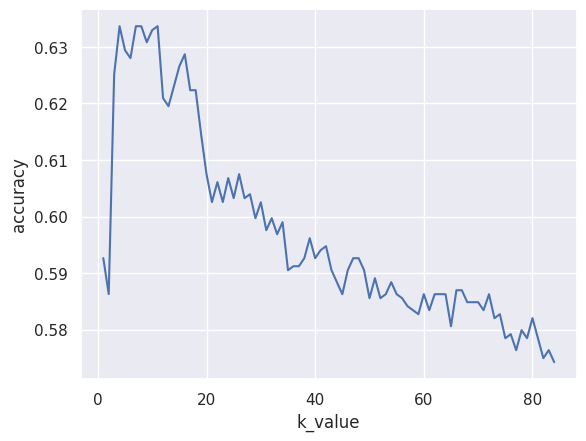

In [ ]:
### Let's see all the accuracies!

import pandas as pd
# Let's create a pandas dataframe out of the above cell's data
crossvalidation_df = pd.DataFrame( {"k_value":np.asarray(range(1,84+1)),
                                    "accuracy":np.asarray(all_accuracies)}
                                    )

import seaborn as sns
sns.set_theme(style="darkgrid")
# Plot the responses for different events and regions
sns.lineplot(x="k_value", y="accuracy",  #  hue="region", style="event",
             data=crossvalidation_df)